# Step0: Load all the imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv("/kaggle/input/37000-reviews-of-thread-app-dataset/37000_reviews_of_thread_app.csv",usecols=['source','review_id','user_name','review_description','rating','review_date','laguage_code','country_code','thumbs_up'])

In [3]:
df.reset_index(inplace = True)

In [4]:
df.head()

,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0.0,2023-08-07 19:14:36,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0.0,2023-08-07 18:37:16,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0.0,2023-08-07 18:14:15,en,us


In [5]:
df.shape

(36943, 10)

# step1: Some eda [univariate eda,numerical data]

In [6]:
df['rating'].value_counts()

5    17000
1    11282
4     3588
3     2956
2     2117
Name: rating, dtype: int64

In [7]:
df['thumbs_up'].value_counts()

0.0      30611
1.0       2889
2.0        520
3.0        193
4.0        124
         ...  
164.0        1
91.0         1
547.0        1
268.0        1
114.0        1
Name: thumbs_up, Length: 149, dtype: int64

## 1. Some plots

<Axes: title={'center': 'count for ratings'}>

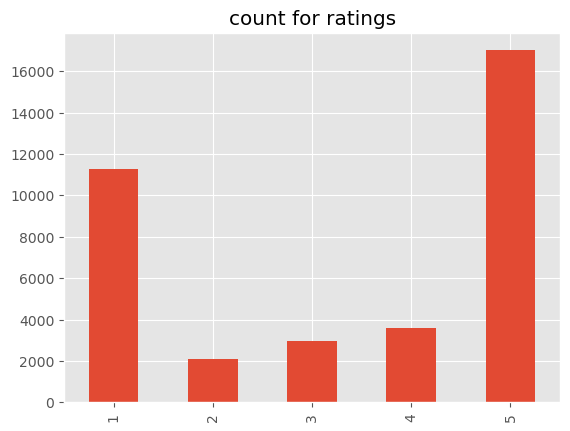

In [8]:
df['rating'].value_counts().sort_index().plot(kind='bar',title = 'count for ratings')


# step2: Basic NLTK

## example1:

In [9]:
example = df['review_description'][55]
example

'Super intuitive and easily portable from Instagram etc. I enjoy it I just always forget to use the damn thing after the influx when it debuted!'

### 1. tokeniser

In [10]:
token = nltk.word_tokenize(example)

### 2. part of speech tagging
 grammatical tagging : it will simply tag the related part of speech as an abvreviation.

In [11]:
tag = nltk.pos_tag(token)

### 3. chunk the tagged tokens
Use NLTK's currently recommended named entity chunker to chunk the given list of tagged tokens

In [12]:
chunk = nltk.chunk.ne_chunk(tag)
# chunk.pprint()

# Step 3. VADER Sentiment Scoring
We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

### 1. Create a object of `SentimentIntensityAnalyzer`

In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores(example)

{'neg': 0.138, 'neu': 0.569, 'pos': 0.293, 'compound': 0.7345}

### 2. Getting `polarity_scores` for all `'review_decription'`

In [15]:
result = {}
for i , rows in tqdm(df.iterrows(),total = len(df)):
    text = rows['review_description']
    id_ = rows['index']
    result[id_] = sia.polarity_scores(text)

  0%|          | 0/36943 [00:00<?, ?it/s]

### 3. Result (all polarity score)

In [16]:
final = pd.DataFrame(result).T
final.head().reset_index()

,index,neg,neu,pos,compound
0,0,0.000,0.000,1.000,0.4404
1,1,0.492,0.508,0.000,-0.4404
2,2,0.000,0.532,0.468,0.9201
3,3,0.000,0.192,0.808,0.6369
4,4,0.000,0.295,0.705,0.3384


### 4. Concating the result with dataset

In [17]:
final = pd.concat([final,df],axis = 1)

In [18]:
final.head()

,neg,neu,pos,compound,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
0,0.000,0.000,1.000,0.4404,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0.0,2023-08-07 19:14:36,en,us
1,0.492,0.508,0.000,-0.4404,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,en,us
2,0.000,0.532,0.468,0.9201,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,en,us
3,0.000,0.192,0.808,0.6369,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0.0,2023-08-07 18:37:16,en,us
4,0.000,0.295,0.705,0.3384,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0.0,2023-08-07 18:14:15,en,us


In [19]:
final.sample(10)

,neg,neu,pos,compound,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
9199,0.000,0.263,0.737,0.4215,9199,Google Play,25c64078-7989-4d88-9e26-add258a3ff3c,RADHE SONI,Nice app,5,0.0,2023-07-11 08:41:48,en,us
32785,0.000,0.913,0.087,0.3182,32785,Google Play,08dd890e-b7bc-44d8-a9a6-11adfb839295,Los Kingster,App not working all content messing up cluster...,1,4.0,2023-07-06 11:44:38,en,us
17333,0.000,1.000,0.000,0.0000,17333,Google Play,1e314c06-ecd8-496e-960f-4252f1cb3694,Eniola Rufus,Thread 🤘😁🤘 we are,5,0.0,2023-07-08 01:32:55,en,us
32635,0.000,0.476,0.524,0.6705,32635,Google Play,5688dc2f-480c-4007-b169-645a4e689190,Faraz Khan,Good morning for new opportunities to tweeter,5,0.0,2023-07-06 12:05:47,en,us
35924,0.178,0.637,0.185,0.0258,35924,App Store,dd909fad-e362-4170-897c-a9dc9c58d719,IDFK!!!!!!!!,Better than having to deal with the freaking p...,5,NaN,2023-07-06 20:49:30,en,us
11005,0.000,1.000,0.000,0.0000,11005,Google Play,8298ca68-2d69-4b52-8249-ef143794f220,Grant whitman,The app was using about 99% of my battery. Del...,1,0.0,2023-07-10 01:54:35,en,us
31832,0.000,0.877,0.123,0.2724,31832,Google Play,b34d47b5-a7a3-4ecd-af2f-5aceb10dac61,VIKASH BARAIYA,Very good this app but this app in privacy see...,4,0.0,2023-07-06 13:48:27,en,us
22928,0.000,0.385,0.615,0.4927,22928,Google Play,14384004-ff40-4c30-8506-5ac16237c6d1,Abdou Belloumi,Very good app,5,0.0,2023-07-07 09:39:27,en,us
28789,0.000,1.000,0.000,0.0000,28789,Google Play,7a3244bd-0e03-4e38-b4f5-94081b54df8a,pankaj tholia,Thik s le,3,0.0,2023-07-06 19:08:42,en,us
19793,0.000,0.263,0.737,0.4215,19793,Google Play,7b28e389-c129-4964-9f12-d5c1f4f4ce1d,Haris Kahn,Nice app,5,0.0,2023-07-07 17:55:25,en,us
